In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

C:\Users\ROSHAN\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df= pd.read_csv('E:\Rohan\Datasets\Digital Cognition Internship\Marketing Mix Modelling\Auto.csv', na_values='?').dropna()

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


# Cross Validation

We illustrate the validation set approach on the Auto data set. Recall from
Chapter 3 that there appears to be a non-linear relationship between mpg
and horsepower, and that a model that predicts mpg using horsepower and
horsepower2 gives better results than a model that uses only a linear term.
It is natural to wonder whether a cubic or higher-order fit might provide better results.

The validation set error rates
that result from fitting various regression models on the training sample
and evaluating their performance on the validation sample, using MSE
as a measure of validation set error,

In [27]:
t_prop = 0.5
p_order = np.arange(1,11)  #Polynomial orders to be taken in account (1-10)
r_state = np.arange(1,11)
X,Y = np.meshgrid(p_order,r_state,indexing='ij')
Z = np.zeros((p_order.size ,r_state.size))
Z

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

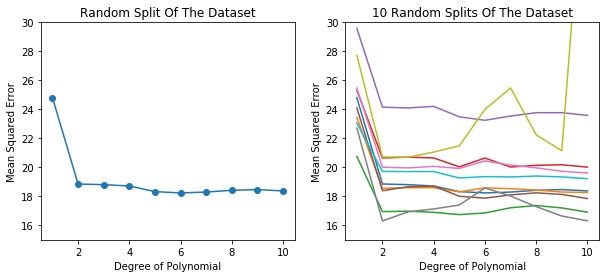

In [26]:
LinearRegression = skl_lm.LinearRegression()

# Generating 10 random samples from dataset for the cross-validation

for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(int(X[i,j]))
    X_poly=poly.fit_transform(df.horsepower.values.reshape(-1,1))
    X_train, X_test, y_train, y_test = train_test_split(X_poly, df.mpg.ravel(),
                                                        test_size=0.5, random_state=Y[i,j])
    LinearRegression.fit(X_train ,y_train)
    pred = LinearRegression.predict(X_test)
    Z[i,j]=mean_squared_error(y_test,pred)
    

fig , (ax1, ax2)=plt.subplots(1,2 ,figsize=(10,4))


ax1.plot(X.T[0] ,Z.T[0] ,marker='o')
ax1.set_title('Random Split Of The Dataset')

ax2.plot(X,Z)
ax2.set_title('10 Random Splits Of The Dataset')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(15,30)
    ax.set_xlabel('Degree of Polynomial')
    #ax.set_xlim(0.5,10.5)
    ax.set_xticks(range(2,11,2));

Here, we see that in the left plot, We observe only 1 random split of thr training and test (validation) set. The MSE for the degree of 2 is the lower after 1.

All the curves here on right plot are different because we took 10 different training sets from the dataset
In each of the 10 curves on right plot, we can observe the MSE always dips when degree changes from 1 to 2.

Hence can conclude that the linear fit (degree=1) for the column, horsepower is not a good fit for this equation.

# Leave-One-Out Cross-Validation

LOOCV involves splitting the set of
observations into two parts. However, instead of creating two subsets of
comparable size, a single observation (x1, y1) is used for the validation
set, and the remaining observations {(x2, y2), . . . , (xn, yn)} make up the
training set. The statistical learning method is fit on the n − 1 training
observations, and a prediction ˆy1 is made for the excluded observation,
using its value x1

In [31]:
p_order = np.arange(1,11)
r_state = np.arange(0,10)

# LeaveOneOut CV
regr = skl_lm.LinearRegression()
loo = LeaveOneOut()
loo.get_n_splits(df)
scores = list()

for i in p_order:
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(df.horsepower.values.reshape(-1,1))
    score = cross_val_score(regr, X_poly, df.mpg, cv=loo, scoring='neg_mean_squared_error').mean()
    scores.append(score)

LeaveOneOut()

In [37]:
# k-fold CV
folds = 10
elements = len(df.index)

X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size,r_state.size))

regr = skl_lm.LinearRegression()

for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(X[i,j])
    X_poly = poly.fit_transform(df.horsepower.values.reshape(-1,1))
    kf_10 = KFold(n_splits=folds, random_state=Y[i,j])
    Z[i,j] = cross_val_score(regr, X_poly, df.mpg, cv=kf_10, scoring='neg_mean_squared_error').mean()

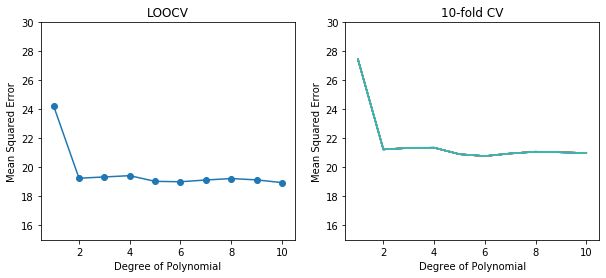

In [38]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Note: cross_val_score() method return negative values for the scores.
# https://github.com/scikit-learn/scikit-learn/issues/2439

# Left plot
ax1.plot(p_order, np.array(scores)*-1, '-o')
ax1.set_title('LOOCV')

# Right plot
ax2.plot(X,Z*-1)
ax2.set_title('10-fold CV')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(15,30)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0.5,10.5)
    ax.set_xticks(range(2,11,2))